# Company Bankruptcy Case

### Description

This classification task is based on the Kaggle dataset: <a href=https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction >Company Bankruptcy Prediction *Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009*</a>. The dataset is under public domain license (v10.0).

## 1.Dataset

### Features:

Y - Bankrupt?: Class label

- X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
- X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
- X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
- X4 - Operating Gross Margin: Gross Profit/Net Sales
- X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
- X6 - Operating Profit Rate: Operating Income/Net Sales
- X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
- X8 - After-tax net Interest Rate: Net Income/Net Sales
- X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
- X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
- X11 - Operating Expense Rate: Operating Expenses/Net Sales
- X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
- X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
- X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
- X15 - Tax rate (A): Effective Tax Rate
- X16 - Net Value Per Share (B): Book Value Per Share(B)
- X17 - Net Value Per Share (A): Book Value Per Share(A)
- X18 - Net Value Per Share (C): Book Value Per Share(C)
- X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
- X20 - Cash Flow Per Share
- X21 - Revenue Per Share (Yuan ¥): Sales Per Share
- X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
- X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
- X24 - Realized Sales Gross Profit Growth Rate
- X25 - Operating Profit Growth Rate: Operating Income Growth
- X26 - After-tax Net Profit Growth Rate: Net Income Growth
- X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
- X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
- X29 - Total Asset Growth Rate: Total Asset Growth
- X30 - Net Value Growth Rate: Total Equity Growth
- X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
- X32 - Cash Reinvestment %: Cash Reinvestment Ratio
- X33 - Current Ratio
- X34 - Quick Ratio: Acid Test
- X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
- X36 - Total debt/Total net worth: Total Liability/Equity Ratio
- X37 - Debt ratio %: Liability/Total Assets
- X38 - Net worth/Assets: Equity/Total Assets
- X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
- X40 - Borrowing dependency: Cost of Interest-bearing Debt
- X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
- X42 - Operating profit/Paid-in capital: Operating Income/Capital
- X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
- X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
- X45 - Total Asset Turnover
- X46 - Accounts Receivable Turnover
- X47 - Average Collection Days: Days Receivable Outstanding
- X48 - Inventory Turnover Rate (times)
- X49 - Fixed Assets Turnover Frequency
- X50 - Net Worth Turnover Rate (times): Equity Turnover
- X51 - Revenue per person: Sales Per Employee
- X52 - Operating profit per person: Operation Income Per Employee
- X53 - Allocation rate per person: Fixed Assets Per Employee
- X54 - Working Capital to Total Assets
- X55 - Quick Assets/Total Assets
- X56 - Current Assets/Total Assets
- X57 - Cash/Total Assets
- X58 - Quick Assets/Current Liability
- X59 - Cash/Current Liability
- X60 - Current Liability to Assets
- X61 - Operating Funds to Liability
- X62 - Inventory/Working Capital
- X63 - Inventory/Current Liability
- X64 - Current Liabilities/Liability
- X65 - Working Capital/Equity
- X66 - Current Liabilities/Equity
- X67 - Long-term Liability to Current Assets
- X68 - Retained Earnings to Total Assets
- X69 - Total income/Total expense
- X70 - Total expense/Assets
- X71 - Current Asset Turnover Rate: Current Assets to Sales
- X72 - Quick Asset Turnover Rate: Quick Assets to Sales
- X73 - Working capitcal Turnover Rate: Working Capital to Sales
- X74 - Cash Turnover Rate: Cash to Sales
- X75 - Cash Flow to Sales
- X76 - Fixed Assets to Assets
- X77 - Current Liability to Liability
- X78 - Current Liability to Equity
- X79 - Equity to Long-term Liability
- X80 - Cash Flow to Total Assets
- X81 - Cash Flow to Liability
- X82 - CFO to Assets
- X83 - Cash Flow to Equity
- X84 - Current Liability to Current Assets
- X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
- X86 - Net Income to Total Assets
- X87 - Total assets to GNP price
- X88 - No-credit Interval
- X89 - Gross Profit to Sales
- X90 - Net Income to Stockholder's Equity
- X91 - Liability to Equity
- X92 - Degree of Financial Leverage (DFL)
- X93 - Interest Coverage Ratio (Interest expense to EBIT)
- X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
- X95 - Equity to Liability

## 2. EDA

In [178]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score

import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [156]:
df = pd.read_csv("data//data.csv")

In [157]:
print(df.head(5))

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [158]:
print(pd.isnull(df).sum().sort_values())

Bankrupt?                                 0
 Total income/Total expense               0
 Retained Earnings to Total Assets        0
 Long-term Liability to Current Assets    0
 Current Liabilities/Equity               0
                                         ..
 Regular Net Profit Growth Rate           0
 After-tax Net Profit Growth Rate         0
 Operating Profit Growth Rate             0
 Net Income Flag                          0
 Equity to Liability                      0
Length: 96, dtype: int64


0    6599
1     220
Name: Bankrupt?, dtype: int64


<BarContainer object of 2 artists>

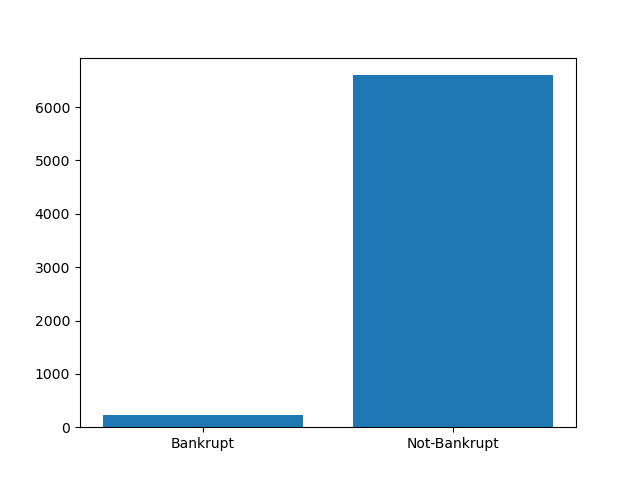

In [159]:
print(df["Bankrupt?"].value_counts())
fig = plt.figure()
plt.bar(["Bankrupt","Not-Bankrupt"],[len(df[df["Bankrupt?"] == 1]),len(df[df["Bankrupt?"] == 0])])

In [160]:
corr_mat = df.corr()

mat1 = corr_mat[corr_mat>0.5]
mat2 = corr_mat[corr_mat<-0.2]
mask=np.triu(corr_mat)

sns.heatmap(mat1,mask=mask,annot=False)

<AxesSubplot:>

## Distribution of data

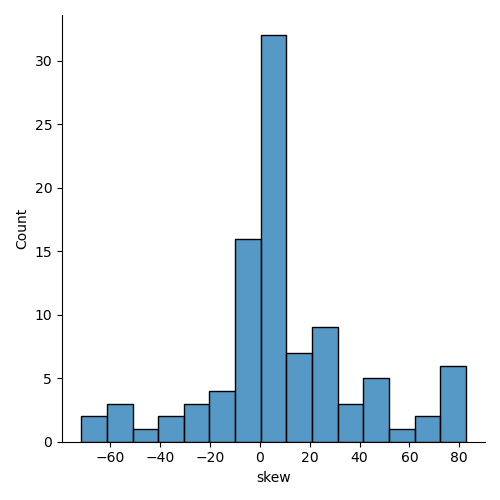

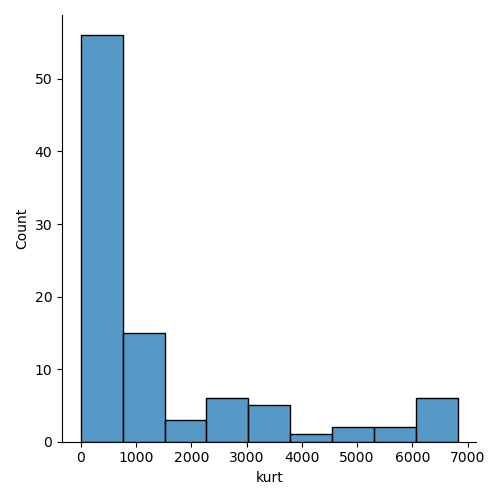

In [161]:
desc_df =df.copy()
skew_vals =[]
kurt_vals =[]
for c in desc_df.columns:
    
    skew_vals.append( desc_df[c].skew())
    kurt_vals.append(desc_df[c].kurt())
desc_df = desc_df.T
desc_df["skew"] = skew_vals
desc_df["kurt"] = kurt_vals
sns.displot(desc_df["skew"])
sns.displot(desc_df["kurt"])

### Feature importances and oversampling

In [162]:
# for c in df.columns:
#     if df[c].skew() > 20 or df[c].skew() < -20: 
#         sns.displot(df[c])
#         plt.show()

## PCA

In [163]:
pca = PCA(n_components=3)
pca_mat = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_mat, columns=["feature1","feature2","feature3"])

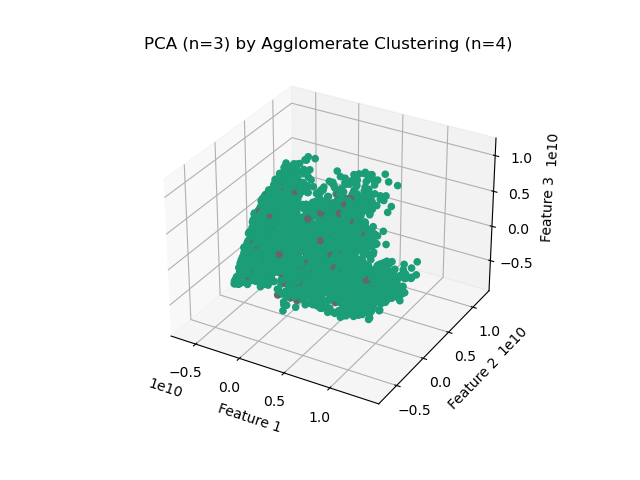

In [164]:
%matplotlib widget
xs=pca_df["feature1"]
ys=pca_df["feature2"]
zs=pca_df["feature3"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
COLORS = ["#003f5c","#58508d","#bc5090","#ff6361","#ffa600"]
ax.scatter3D(xs, ys, zs,alpha=1,c=df["Bankrupt?"],cmap="Dark2")

ax.set_title("PCA (n=3) by Agglomerate Clustering (n=4)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
  

plt.show()

In [165]:
from sklearn.model_selection import train_test_split
y = df.pop("Bankrupt?")
X = df
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)


In [166]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(X.shape,y.shape)

(5455, 95) (5455,) (1364, 95) (1364,)
(6819, 95) (6819,)


In [167]:
mutual_inf = mutual_info_classif(X_train,y_train)
mi = pd.Series(mutual_inf)
mi.index = df.columns
top_features = mi.sort_values(ascending=False)[:15]
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]


Index([' ROA(A) before interest and % after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [168]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

### Under/Over Sampling

In [134]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)

(342, 95)


In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)

(10552, 95)


In [169]:
normalizer = tf.keras.layers.Normalization(axis=None)

model= tf.keras.Sequential([
    normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model.fit(X_train_over, 
                      y_train_over, 
                      epochs=100,
                      verbose=0
                      callbacks=[lr_scheduler])
     

Epoch 1/100
330/330 [==============================] - 2s 3ms/step - loss: 166808912.0000 - accuracy: 0.4755 - lr: 1.0000e-04
Epoch 2/100
330/330 [==============================] - 1s 3ms/step - loss: 59504420.0000 - accuracy: 0.5521 - lr: 1.1220e-04
Epoch 3/100
330/330 [==============================] - 2s 5ms/step - loss: 36931984.0000 - accuracy: 0.5948 - lr: 1.2589e-04
Epoch 4/100
330/330 [==============================] - 2s 7ms/step - loss: 26760438.0000 - accuracy: 0.6135 - lr: 1.4125e-04
Epoch 5/100
330/330 [==============================] - 2s 6ms/step - loss: 19842610.0000 - accuracy: 0.6298 - lr: 1.5849e-04
Epoch 6/100
330/330 [==============================] - 1s 3ms/step - loss: 15156512.0000 - accuracy: 0.6473 - lr: 1.7783e-04
Epoch 7/100
330/330 [==============================] - 1s 3ms/step - loss: 11989769.0000 - accuracy: 0.6653 - lr: 1.9953e-04
Epoch 8/100
330/330 [==============================] - 1s 3ms/step - loss: 9835363.0000 - accuracy: 0.6753 - lr: 2.2387e-04


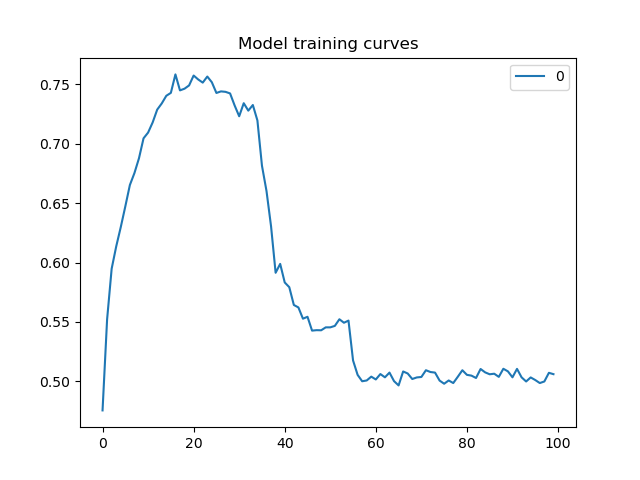

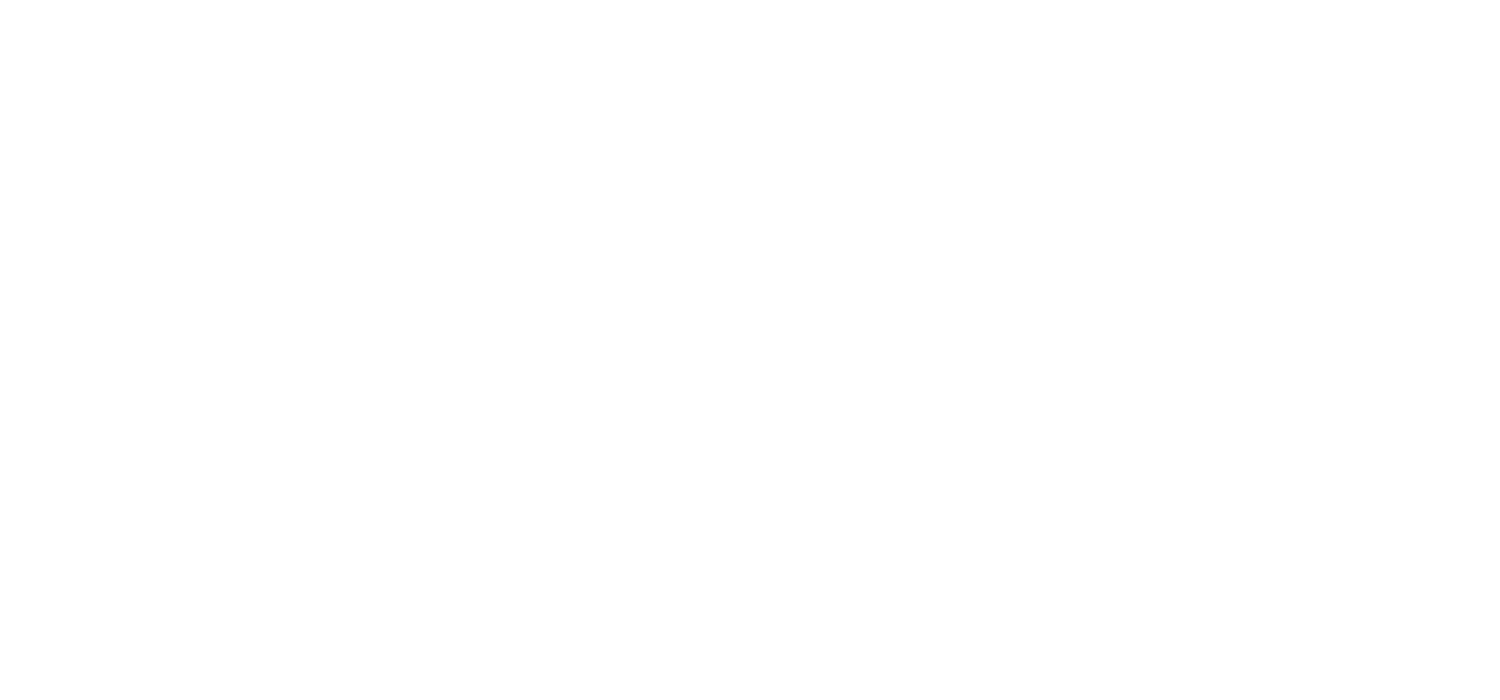

In [175]:
fig = plt.figure(figsize=(15,7))
pd.DataFrame(history.history["accuracy"]).plot()
plt.title("Model training curves")
plt.show()

In [177]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
def get_scores(y_hat,y_true,model_name):
    return {
        "model":model_name,
        "f1":f1_score(y_hat,y_true),
        "accuracy":accuracy_score(y_hat,y_true),
        "recall": recall_score(y_hat,y_true),
        "precision":precision_score(y_hat,y_true)
    }

### Random Forest estimator

In [181]:
rf_estimator = RandomForestClassifier()
rf_estimator.fit(X_train,y_train)

RandomForestClassifier()

In [191]:
rf_pred = rf_estimator.predict(X_test)

scores_df = pd.DataFrame(columns=["f1","accuracy","recall","precision"])
scores_df.append(get_scores(rf_pred,y_test,"RF"),ignore_index=True)

C:\Users\nemet\AppData\Local\Temp\ipykernel_33556\1409330398.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df.append(get_scores(rf_pred,y_test,"RF"),ignore_index=True)


,f1,accuracy,recall,precision,model
0,0.285714,0.970674,0.727273,0.177778,RF


XGBoost estimator

In [188]:
from xgboost import XGBClassifier

xgb_estimator = XGBClassifier()
xgb_estimator.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [193]:
xgb_pred = xgb_estimator.predict(X_test)
scores_df.append(get_scores(xgb_pred,y_test,"XGB"),ignore_index=True)

C:\Users\nemet\AppData\Local\Temp\ipykernel_33556\3165613816.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append(get_scores(xgb_pred,y_test,"XGB"),ignore_index=True)


CatBoost estimator

SVM estimator

In [195]:
from sklearn.svm import SVC

svc_estimator = SVC()

svc_estimator.fit(X_train,y_train)

svc_pred = svc_estimator.predict(X_test)
scores_df.append(get_scores(svc_pred,y_test,"SVC"),ignore_index=True)

C:\Users\nemet\AppData\Local\Temp\ipykernel_33556\2085316623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df.append(get_scores(svc_pred,y_test,"SVC"),ignore_index=True)


,f1,accuracy,recall,precision,model
0,0.369231,0.969941,0.6,0.266667,XGB
1,0.042553,0.967009,0.5,0.022222,SVC
